In [1]:
""" Primeiro trabalho de IA
    Aluno:  Gabriel Ferrari Cipriano
    Tema:  Algoritmos de Busca e Clusterização
    Trabalho : //TODO
"""

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from problema.clustering import Clustering
from problema.utils import *
from heuristics import grasp, simulated_annealing

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


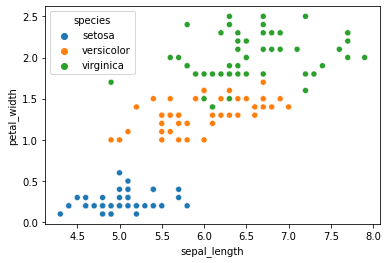

In [2]:
iris = sns.load_dataset("iris")
print(iris)
output = sns.scatterplot(data=iris, 
                        x='sepal_length', 
                        y='petal_width',
                        hue='species')

In [3]:
iris_data = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
data = np.asarray(iris_data)
iris_problem = Clustering(data)

k = 10 
 sse: 26.127630352104042 
 iter:  50


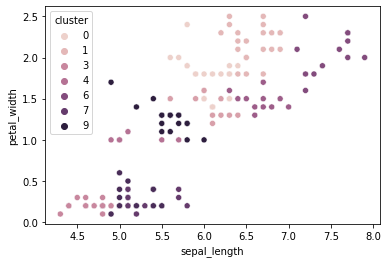

In [4]:
centroids, i, t, labels, min_dists = grasp(iris_problem,
                                              k = 10,
                                              num_best = 5,
                                              max_iter = 60,
                                              max_time = 1.)

sse = evaluate_state(min_dists)

iris_data["cluster"] = labels

output = sns.scatterplot(data=iris_data, x='sepal_length', y='petal_width',
                         hue='cluster')

print("k = 10 \n sse:", sse, "\n iter: ", i)

k = 10 
 sse: 78.85144142614601 
 tempo:  1.2918580000000004


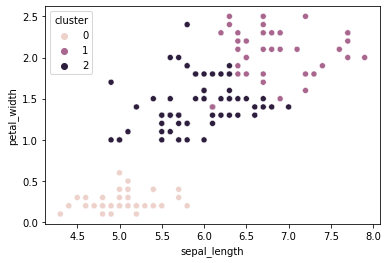

In [5]:
centroids, t = simulated_annealing(iris_problem, k = 3,
                                                 t = 50,
                                                 alfa = 0.7,
                                                 min_t = 1,
                                                 num_iter = 350,
                                                 tempo = 1)

labels, min_dists = iris_problem.assign_clusters(centroids)

sse = evaluate_state(min_dists)

iris_data["cluster"] = labels

output = sns.scatterplot(data=iris_data, x='sepal_length', y='petal_width',
                         hue='cluster')

print("k = 10 \n sse:", sse, "\n tempo: ", t)